1. Simulate any random rectangular matrix A.
_usar numpy.rand_
- What is the rank and trace of A? 
_realizar explicacion sencilla_
- What is the determinant of A? 
- Can you invert A? How?
_para invertir el det debe ser 0_
_investigar sobre la pseudoinversa_
- How are eigenvalues and eigenvectors of A’A and AA’ related? What interesting differences can you notice between both?
_mostrar en código_ _eigenvalores son los mismos, eigenvectores son distintos_
- See [https://sites.cs.ucsb.edu/~mturk/Papers/jcn.pdf]


In [1]:
import pandas as pd
import numpy as np

In [2]:
A = np.random.rand(4,2)
A

array([[0.67732194, 0.83315011],
       [0.96755773, 0.37056563],
       [0.48145941, 0.62762318],
       [0.18341215, 0.41568587]])

The rank of a matrix is the maximum number of columns or rows that are linearly independent. It's a measure of the linear independence of the columns or rows of a matrix. The rank of matrix `A` is 2 because is the smaller number between the dimensions of the matrix, which is 4 and 2. 

The trace is the sum along the diagonal of the matrix. The matrix `A` is not squared, but its possible to calculate the trace by adding the elements where row index and column index are equal. For matrix `A` the only elements that satisfy this condition are A(1,1) and A(2,2), so performing the addition of this elements results in the trace.

In [3]:
# rank
rank = np.linalg.matrix_rank(A)
print(f"Rank of matrix A is {rank}.")
trace = np.trace(A)
print(f"Trace of matrix A is {trace}.")

Rank of matrix A is 2.
Trace of matrix A is 1.0478875712923754.


In [4]:
#transpose
print(f"shape of matrix is {A.shape}")
print(f"shape of transpose matrix is {A.T.shape}")

shape of matrix is (4, 2)
shape of transpose matrix is (2, 4)


In [5]:
# determinant
try:
    det = np.linalg.det(A)
    det
except Exception as e:
    print(e)

Last 2 dimensions of the array must be square


It's not possible to calculate determinant of `matrix` because its not an squared matrix. When `linalg.det` is called, an exception is thrown: _Last 2 dimensions of the array must be square_. Because of that, its also not possible to calculate the inverse of `matrix` having in mind that for a matrix to have inverse is required a determinant of 0. 

However, its possible to calculate the pseudo-inverse of non-square matrix. The pseudo-inverse matrix is like an 'approximation' of the inverse and its useful to solve linear equations, among other things. The notation for the pseudo-inverse matrix of matrix A is A^+ . To calculate the pseudo-inverse, proceed as follows:

$ A^{+} = (A^T A)^{-1}A^T $

In [6]:
# inverse
inv = np.linalg.pinv(A)
inv

array([[-0.21832865,  1.38592621, -0.22851942, -0.45287082],
       [ 0.79908742, -1.02484468,  0.6615742 ,  0.71879551]])

In [7]:
# eig1 is A*A'
eigval1, eigvec1 = np.linalg.eig(np.dot(A, A.T))
# eig2 is A'*A
eigval2, eigvec2 = np.linalg.eig(np.dot(A.T, A))


print(f"eigenvalue of A*A' \n{eigval1}")
print(f"eigenvalue of A'*A \n{eigval2}")

print(f"eigenvalue of A*A' \n{eigvec1}")
print(f"eigenvalue of A'*A \n{eigvec2}")

eigenvalue of A*A' 
[2.83712926e+00 2.21410496e-01 6.26616312e-17 9.35214284e-18]
eigenvalue of A'*A 
[2.83712926 0.2214105 ]
eigenvalue of A*A' 
[[-0.63001853  0.34778966  0.36724629 -0.58644504]
 [-0.57361771 -0.7950812   0.06646985  0.18595064]
 [-0.46193001  0.30301345 -0.81739839  0.15701646]
 [-0.2462926   0.39379066  0.43883003  0.77256094]]
eigenvalue of A'*A 
[[ 0.74170241 -0.67072911]
 [ 0.67072911  0.74170241]]


It can be seen that there are 2 eigenvalues for $A*A'$ and 4 eigenvalues for $A'*A$. Though the ammount of eigenvalues differs, the first 2 eigenvalues (1.66970271 and 0.64724862) are the same for both matrices $A*A'$ and $A'*A$. On the other hand, the eigenvectors are completely different for both matrices.

2. Add a steady, well-centered picture of your face to a shared folder alongside your classmates.
Edit your picture to be 256x256 pixels, grayscale (single channel)
Plot your edited face

    _subir en teams una foto de la cara, centrada_
    _usar matplotlib_


    Calculate and plot the average face of the cohort

    _usar numpy_

    How distant is your face from the average? How would you measure it?

    _como se calcula la distancia entre matrices_
    _usar numpy frobenius distancia_


In [8]:
# escalar todas las fotos a 256 y dejarlas en grayscale
from PIL import Image
from glob import glob
import os

photos_folder = glob("photos/*.jpg")
size = 256, 256
processed_folder_path = "photos_processed"

if not os.path.exists(processed_folder_path):
    os.makedirs(processed_folder_path)

for photo_file in photos_folder:
    try:
        im = Image.open(photo_file)
    except:
        pass
    im = im.resize(size)
    im = im.convert("L")
    im.save(os.path.join(processed_folder_path, os.path.basename(photo_file)), "JPEG")



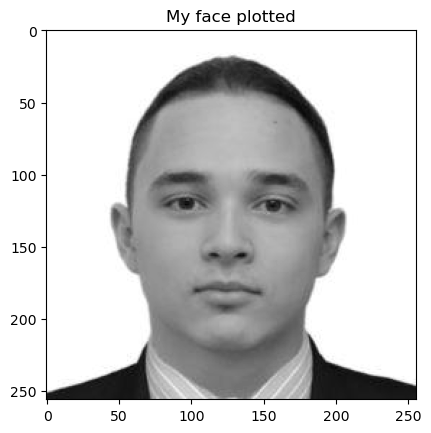

In [9]:
# plot my face
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

my_face_file = "FedericoOcampo.jpg"
processed_folder_path = "photos_processed"

img = mpimg.imread(os.path.join(processed_folder_path, my_face_file))

plt.imshow(img, cmap='gray')
plt.title("My face plotted")
plt.show()

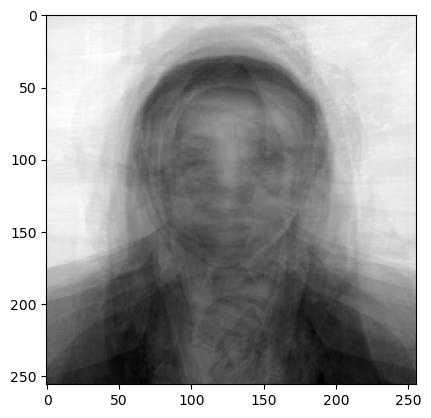

In [10]:
from glob import glob
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

processed_folder_path = "photos_processed"

photos_folder = glob(os.path.join(processed_folder_path,"*.jpg"))

imgs = []
for photo_file in photos_folder:
    img = np.asarray(Image.open(photo_file))
    imgs.append(img)

averaged_face = np.average(imgs, axis=0)
avg_face_img = Image.fromarray(averaged_face)
avg_face_img.convert("L").save("averaged_face.jpg")
plt.imshow(averaged_face, cmap="gray")
plt.show()


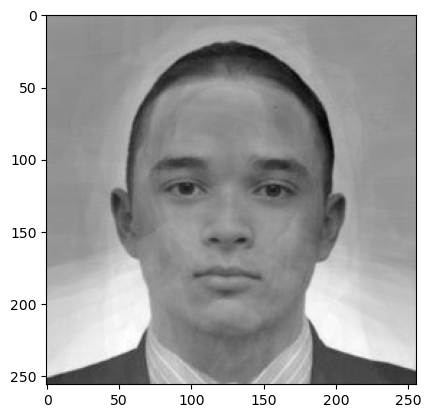

In [11]:
#my_face_file = "averaged_face.jpg"
my_face_file = "FedericoOcampo.jpg"
processed_folder_path = "photos_processed"

img = np.asarray(Image.open(os.path.join(processed_folder_path, my_face_file)))

#distance = np.subtract(img, averaged_face )
distance = img - averaged_face
plt.imshow(distance, cmap="gray")
plt.show()

In [12]:
dist = np.linalg.norm(img-averaged_face, ord="fro")
print(f"The frobenius distance between my face and the average is {dist}")

The frobenius distance between my face and the average is 16672.902440618393


3. Let’s create the unsupervised Python package
_crear paquete, con clases, fit, fit_transform, hyperparms_
- Same API as scikit-learn: fit(), fit_transform(), transform(), hyperparams at init
- Manage dependencies with Pipenv or Poetry
- Implement SVD from scratch using Python and NumPy
- Implement PCA from scratch using Python and NumPy
[https://github.com/rushter/MLAlgorithms/blob/master/mla/pca.py,
https://github.com/patchy631/machine-learning/blob/main/ml_from_scratch/PCA_from_scratch.ip
ynb]
- Implement t-SNE from scratch using Python and NumPy
[https://nlml.github.io/in-raw-numpy/in-raw-numpy-t-sne/]


4. Apply SVD over the picture of your face, progressively increasing the number of singular values used. Is there any point where you can say the image is appropriately reproduced? How would you quantify how different your photo and the approximation are?
_jugar con la reconstrucción, cambio de componentes_


In [13]:
import os
import sys
module_path = os.path.abspath(os.path.join('.','mlpackage'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [14]:
import sys
print(sys.path)

['g:\\Mi unidad\\Especialización ciencia de datos\\ML II\\ML_II_Lab_I', 'c:\\Users\\fede_\\anaconda3\\envs\\bd_prueba\\python39.zip', 'c:\\Users\\fede_\\anaconda3\\envs\\bd_prueba\\DLLs', 'c:\\Users\\fede_\\anaconda3\\envs\\bd_prueba\\lib', 'c:\\Users\\fede_\\anaconda3\\envs\\bd_prueba', '', 'c:\\Users\\fede_\\anaconda3\\envs\\bd_prueba\\lib\\site-packages', 'c:\\Users\\fede_\\anaconda3\\envs\\bd_prueba\\lib\\site-packages\\win32', 'c:\\Users\\fede_\\anaconda3\\envs\\bd_prueba\\lib\\site-packages\\win32\\lib', 'c:\\Users\\fede_\\anaconda3\\envs\\bd_prueba\\lib\\site-packages\\Pythonwin', 'g:\\Mi unidad\\Especialización ciencia de datos\\ML II\\ML_II_Lab_I\\mlpackage']


u.shape:(256, 256),s.shape:(256,),v.shape:(256, 256)
MSE for 240 components: 1.5505456067730142e-24
MSE for 200 components: 1.5343034784244827e-24
MSE for 50 components: 7.656828944804744
MSE for 20 components: 61.61786374269441
MSE for 18 components: 72.73099148675091
MSE for 10 components: 162.93816565576356


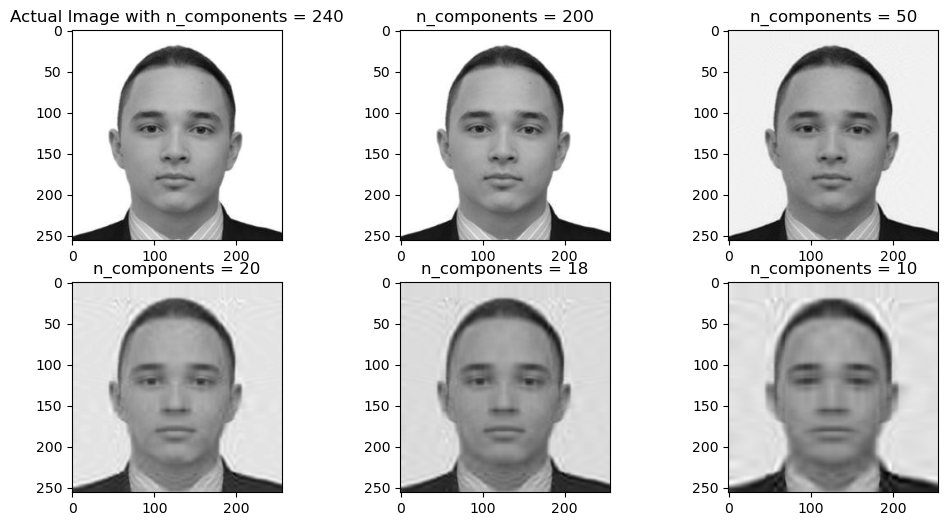

In [24]:
#my_face_file = "averaged_face.jpg"
my_face_file = "FedericoOcampo.jpg"
processed_folder_path = "photos_processed"

img = np.asarray(Image.open(os.path.join(processed_folder_path, my_face_file)))

u, s, v = np.linalg.svd(img, full_matrices=False)
print(f'u.shape:{u.shape},s.shape:{s.shape},v.shape:{v.shape}')
# plot images with different number of components
comps = [240, 200, 50, 20, 18, 10]
plt.figure(figsize=(12, 6))
  
for i in range(len(comps)):
    low_rank = u[:, :comps[i]] @ np.diag(s[:comps[i]]) @ v[:comps[i], :]

    squared_diff = (img - low_rank) ** 2
    mse = np.mean(squared_diff)
    print(f"MSE for {comps[i]} components: {mse}")
    if(i == 0):
        plt.subplot(2, 3, i+1),
        plt.imshow(low_rank, cmap='gray'),
        plt.title(f'Actual Image with n_components = {comps[i]}')
      
    else:
        plt.subplot(2, 3, i+1),
        plt.imshow(low_rank, cmap='gray'),
        plt.title(f'n_components = {comps[i]}')

It can be seen that with around 30 components is possible to approximate to original matrix. One way to measure the svd matrix is calculate the Mean Squared Error (MSE) between the resulting SVD matrix and the original matrix. The smaller the error, the better the approximation.

## No working

In [16]:
np.diag(s).shape

(256, 256)

In [17]:
from mymlkit.svd import SVD

In [21]:
def calcMat2(M, opc):
    
    mean = np.mean(M, axis=0)
    X = np.copy(M)
    M = M - mean
    cov = np.cov(M, rowvar=False)

    eigenvalues, eigenvectors = np.linalg.eigh(cov)

    # sort the eigenvalues and eigenvectors in decreasing order
    idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]

    # store the first n_components eigenvectors as the principal components
    components = eigenvectors[:, : 20]
    X = X - mean
    X_transformed = np.dot(X, components)
    return X_transformed

def calcMat(M, opc):
    #Case of V Matrix
    if opc == 1:
        #newM = M.T @ M
        newM = np.dot(M.T, M)
    #Case of U Matrix
    if opc == 2:
        #newM = M @ M.T
        newM = np.dot(M, M.T)
    
    #cov = np.cov(newM, rowvar=False)
    eigenvalues, eigenvectors = np.linalg.eig(newM)
    ncols = np.argsort(eigenvalues)[::-1]

    #Case of V Matrix, let's transpose it
    if opc == 1:
        return eigenvectors[:,ncols].T
    #Case of U, return normally
    else: return eigenvectors[:,ncols]


#Function that calculates Eigenvalues corresponding to the Sigma Matrix
def calcD(M):
    if (np.size(np.dot(M, M.T)) > np.size(np.dot(M.T, M))):
        newM = np.dot(M.T, M)
    else:
        newM = np.dot(M, M.T)
    
    """ if (np.size(M @ M.T) > np.size(M.T @ M)):
        newM = M.T @ M
    else:
        newM = M @ M.T """
    
    eigenvalues, eigenvectors = np.linalg.eig(newM)
    #eigenvalues = np.sqrt(eigenvalues)
    #Sorting in descending order as the svd function does
    return eigenvalues[::-1]


from matplotlib.image import imread
#my_face_file = "averaged_face.jpg"
my_face_file = "Webp-compressed.jpg"
processed_folder_path = "photos_processed"

img = imread(os.path.join(processed_folder_path, my_face_file))

#Calling the corresponding Fuctions and saving the values in variables
Vt = calcMat(img, 1)
U = calcMat(img,2)
Sigma = calcD(img)


In [23]:
#Creating our matrix
A = np.array([[4, 2, 0], [1, 5, 6]])
#Calling the corresponding Fuctions and saving the values in variables
Vt = calcMat(A, 1)
U = calcMat(A,2)
Sigma = calcD(A)

print(Vt,"\n")
print(U, "\n")
print(Sigma)

Traceback (most recent call last):
  File "_pydevd_bundle/pydevd_cython.pyx", line 1078, in _pydevd_bundle.pydevd_cython.PyDBFrame.trace_dispatch
  File "_pydevd_bundle/pydevd_cython.pyx", line 297, in _pydevd_bundle.pydevd_cython.PyDBFrame.do_wait_suspend
  File "c:\Users\fede_\anaconda3\envs\bd_prueba\lib\site-packages\debugpy\_vendored\pydevd\pydevd.py", line 1976, in do_wait_suspend
    keep_suspended = self._do_wait_suspend(thread, frame, event, arg, suspend_type, from_this_thread, frames_tracker)
  File "c:\Users\fede_\anaconda3\envs\bd_prueba\lib\site-packages\debugpy\_vendored\pydevd\pydevd.py", line 2011, in _do_wait_suspend
    time.sleep(0.01)
KeyboardInterrupt


KeyboardInterrupt: 

In [152]:
from matplotlib.image import imread
#my_face_file = "averaged_face.jpg"
my_face_file = "Webp-compressed.jpg"
processed_folder_path = "photos_processed"

img = imread(os.path.join(processed_folder_path, my_face_file))

#Calling the corresponding Fuctions and saving the values in variables
Vt = calcMat(img, 1)
U = calcMat(img,2)
Sigma = calcD(img)


print(Vt,"\n")
print(U, "\n")
print(Sigma)

[[ 0.05883455  0.05687628  0.06302385 ...  0.06026099  0.06140617
   0.0648006 ]
 [ 0.03623247 -0.0565801  -0.08376428 ... -0.05951604 -0.05304918
  -0.11896188]
 [ 0.14865739 -0.15541134  0.00858    ... -0.04912469 -0.01228549
  -0.04482393]
 ...
 [-0.00759149 -0.00028355  0.08529539 ...  0.01085666  0.00600481
  -0.04263161]
 [ 0.05593777 -0.08129792 -0.03111873 ... -0.12409806 -0.06663406
   0.05130293]
 [ 0.13016031  0.00180158 -0.03295796 ...  0.00858294  0.03090097
   0.12450791]] 

[[ 0.06009133  0.05527784 -0.13586302 ... -0.10318971  0.00844534
  -0.05216956]
 [ 0.05923437  0.05017694 -0.07167926 ...  0.1539109   0.06094803
   0.07491029]
 [ 0.06764723  0.0512754  -0.01825792 ... -0.00254269  0.03893897
   0.1352172 ]
 ...
 [ 0.05866647  0.03392498 -0.01359028 ...  0.09361547 -0.04862503
   0.03399437]
 [ 0.06724183  0.00440831  0.0724281  ...  0.01147175 -0.00775001
   0.00893271]
 [ 0.06008683  0.09025603 -0.01801493 ... -0.01069801  0.0088839
  -0.04416208]] 

[  5.69133594

C:\Users\fede_\AppData\Local\Temp\ipykernel_23648\3582460385.py:67: RuntimeWarning: invalid value encountered in sqrt
  eigenvalues = np.sqrt(eigenvalues)


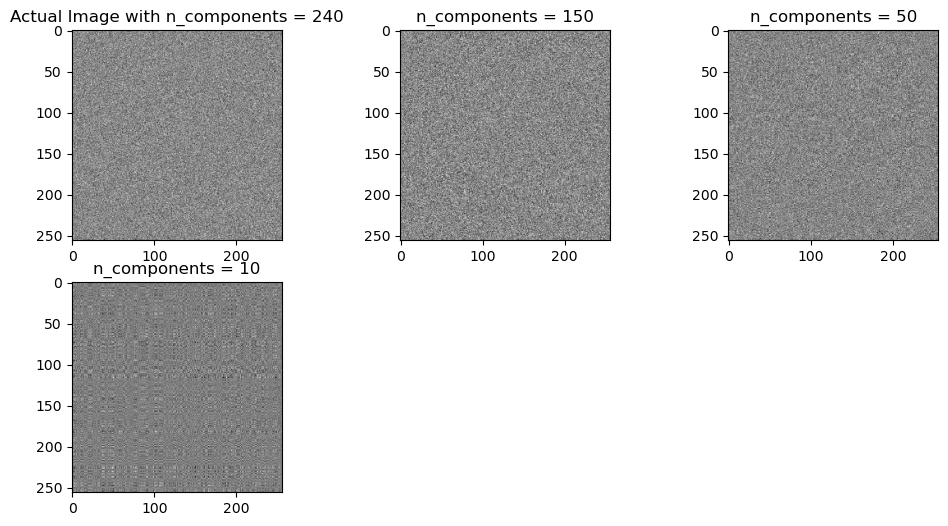

In [22]:
# plot images with different number of components
comps = [240, 150, 50, 10]
plt.figure(figsize=(12, 6))
  
for i in range(len(comps)):
    low_rank = U[:, :comps[i]] @ np.diag(Sigma[:comps[i]]) @ Vt[:comps[i], :]
      
    if(i == 0):
        plt.subplot(2, 3, i+1),
        plt.imshow(low_rank, cmap='gray'),
        plt.title(f'Actual Image with n_components = {comps[i]}')
      
    else:
        plt.subplot(2, 3, i+1),
        plt.imshow(low_rank, cmap='gray'),
        plt.title(f'n_components = {comps[i]}')

## 5.
 Train a naive logistic regression on raw MNIST images to distinguish between 0s and 8s. We are calling this our baseline. What can you tell about the baseline performance?
_usando scikit learn_

In [14]:
import pandas as pd

In [13]:
import sklearn

from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 


In [21]:
mnist = load_digits(return_X_y=False)

In [22]:
mnist

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [24]:
Y = pd.DataFrame(mnist.target)
Y_sub = Y[Y[0].isin([0,8])]
Y_sub

,0
0,0
8,8
10,0
18,8
20,0
...,...
1789,8
1790,8
1793,0
1794,8


In [28]:
X = pd.DataFrame(mnist.data)
X

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [32]:
X_sub = X.iloc[Y_sub.index]
X_sub

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
8,0.0,0.0,9.0,14.0,8.0,1.0,0.0,0.0,0.0,0.0,...,8.0,0.0,0.0,0.0,11.0,16.0,15.0,11.0,1.0,0.0
10,0.0,0.0,1.0,9.0,15.0,11.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,10.0,13.0,3.0,0.0,0.0
18,0.0,0.0,10.0,7.0,13.0,9.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,14.0,5.0,0.0,0.0,0.0
20,0.0,0.0,3.0,13.0,11.0,7.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,2.0,12.0,13.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1789,0.0,0.0,8.0,16.0,3.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,10.0,16.0,10.0,1.0,0.0,0.0
1790,0.0,0.0,5.0,12.0,8.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,12.0,12.0,3.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_sub, Y_sub, test_size=0.33, random_state=42)

In [37]:
y_train = y_train.squeeze()

In [34]:
model = LogisticRegression()
model

LogisticRegression()

In [38]:
model.fit(X_train, y_train)

LogisticRegression()

In [40]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 8, 0, 0, 0, 0, 0, 8, 0, 8, 0, 8, 8, 8, 0, 8, 8, 0, 0, 0, 8,
       8, 0, 8, 8, 0, 8, 0, 0, 8, 8, 8, 8, 0, 0, 0, 0, 0, 0, 8, 0, 8, 8,
       8, 0, 8, 0, 0, 8, 8, 8, 8, 0, 8, 0, 0, 8, 0, 8, 8, 0, 0, 0, 8, 0,
       0, 0, 8, 0, 0, 8, 0, 8, 0, 0, 8, 0, 0, 8, 8, 8, 0, 8, 0, 8, 8, 8,
       8, 0, 8, 0, 0, 0, 8, 8, 0, 8, 8, 8, 8, 8, 0, 8, 8, 0, 0, 0, 8, 8,
       8, 8, 8, 8, 8, 0, 0])

In [41]:
accuracy_score(y_test, y_pred)

1.0

6. Now, apply dimensionality reduction using all your algorithms to train the model with only 2 features per image.
_ncomponents en 2_
- Plot the 2 new features generated by your algorithm
_usar matplotlib_
- Does this somehow impact the performance of your model?

In [29]:
import os
import sys
module_path = os.path.abspath(os.path.join('.','mlpackage'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [31]:
from mymlkit.pca import PCA
from mymlkit.linear_models import LogisticRegression
from mymlkit.metrics import accuracy

In [ ]:
for s in ["svd", "eigen"]:
    p = PCA(15, solver=s)

    # fit PCA with training data, not entire dataset
    p.fit(X_train)
    X_train_reduced = p.transform(X_train)
    X_test_reduced = p.transform(X_test)

    model = LogisticRegression(lr=0.001, max_iters=2500)
    model.fit(X_train_reduced, y_train)
    predictions = model.predict(X_test_reduced)
    print("Classification accuracy for %s PCA: %s" % (s, accuracy(y_test, predictions)))

7. Repeat the process above but now using the built-in algorithms in the Scikit-Learn library. How different are these results from those of your implementation? Why?

8. What strategies do you know (or can think of) in order to make PCA more robust? (Bonus points for implementing them)
[https://nbviewer.org/github/fastai/numerical-linear-algebra/blob/master/nbs/3.%20Background%20Remov
al%20with%20Robust%20PCA.ipynb]
_mas robusto a la escala, a la estandarización, buscar en google_

9. What are the underlying mathematical principles behind UMAP? What is it useful for?

10. What are the underlying mathematical principles behind LDA? What is it useful for?

11. Use your unsupervised Python package as a basis to build an HTTP server that receives a record as input and returns the class of the image. Suggestions: MNIST digit classifier, Iris classifier…
_ flask o fast api_
